In [97]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

## 1 Dataset Preprocessing

### 1.1 Explore the dataset

In [98]:
# displaying the original dataset
file_path = 'mxmh_survey_results.csv'
df_original = pd.read_csv(file_path)
display(df_original)

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


In [99]:
# basic info
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

### 1.2 Checking for duplicates and missing values

In [100]:
# checking for duplicates
num_duplicates = df_original.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [101]:
# checking for missing values
missing_values = df_original.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])


Missing values:
 Age                            1
Primary streaming service      1
While working                  3
Instrumentalist                4
Composer                       1
Foreign languages              4
BPM                          107
Music effects                  8
dtype: int64


In [102]:
# dropping all rows with null vlaues
df_cleaned = df_original.dropna()
df_cleaned.shape

(616, 33)

### 1.3 Checking permission, and dropping the permission and Timestamp columns 

In [103]:
# checking for permission (everyone have given their permission, so we drop the column as it does not contain any relevant information)
permission = df_cleaned['Permissions'].unique()
df_cleaned = df_cleaned.drop(columns=['Permissions', 'Timestamp'])
print(permission)

['I understand.']


In [104]:
display(df_cleaned)

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,120.0,...,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve
732,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,160.0,...,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve
733,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,120.0,...,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve
734,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,170.0,...,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve


### 1.4 Changing the names of the columns so they dont contain any spaces

In [105]:
# renaming the columns
df_cleaned = df_cleaned.rename(columns={
    'Primary streaming service': 'primary_streaming_service',
    'Hours per day': 'hours_per_day',
    'While working': 'while_working',
    'Fav genre': 'fav_genre',
    'Foreign languages': 'foreign_languages',
    'Frequency [Classical]': 'frequency_classical',
    'Frequency [Country]': 'frequency_country',
    'Frequency [EDM]': 'frequency_edm',
    'Frequency [Folk]': 'frequency_folk',
    'Frequency [Gospel]': 'frequency_gospel',
    'Frequency [Hip hop]': 'frequency_hip_hop',
    'Frequency [Jazz]': 'frequency_jazz',
    'Frequency [K pop]': 'frequency_k_pop',
    'Frequency [Latin]': 'frequency_latin',
    'Frequency [Lofi]': 'frequency_lofi',
    'Frequency [Metal]': 'frequency_metal',
    'Frequency [Pop]': 'frequency_pop',
    'Frequency [R&B]': 'frequency_rnb',
    'Frequency [Rap]': 'frequency_rap',
    'Frequency [Rock]': 'frequency_rock',
    'Frequency [Video game music]': 'frequency_video_game_music',
    'Music effects': 'music_effects'
})

# rename remaining columns by replacing spaces with underscores and converting to lowercase
df_cleaned.columns = [col.lower().replace(" ", "_") for col in df_cleaned.columns]
df_cleaned.columns


Index(['age', 'primary_streaming_service', 'hours_per_day', 'while_working',
       'instrumentalist', 'composer', 'fav_genre', 'exploratory',
       'foreign_languages', 'bpm', 'frequency_classical', 'frequency_country',
       'frequency_edm', 'frequency_folk', 'frequency_gospel',
       'frequency_hip_hop', 'frequency_jazz', 'frequency_k_pop',
       'frequency_latin', 'frequency_lofi', 'frequency_metal', 'frequency_pop',
       'frequency_rnb', 'frequency_rap', 'frequency_rock',
       'frequency_video_game_music', 'anxiety', 'depression', 'insomnia',
       'ocd', 'music_effects'],
      dtype='object')

### 1.5 Changing categorical scale to numerical scale<br>
In the dataset you have:
- 'while_working', 'instrumentalist', 'composer', 'exploratory', 'foreign_languages': 'Yes', 'No' which becomes 1, 0
- music_effects: 'Worsen', 'No effect', 'Improve' which becomes -1, 0, 1
- frequency_...: 'Never', 'Rarely', 'Sometimes', 'Very frequently' which becomes 0, 1, 2, 3

In [106]:
# identifying binary columns and converting "Yes" to 1 and "No" to 0
bin_col = ['while_working', 'instrumentalist', 'composer', 'exploratory', 'foreign_languages']
df_cleaned[bin_col] = df_cleaned[bin_col].replace({'Yes': 1, 'No': 0})

# replacing music_effects
df_cleaned['music_effects'] = df_cleaned['music_effects'].replace({'Worsen': -1, 'No effect': 0, 'Improve': 1})

# replacing frequency genre columns
frequency_genre = ['frequency_classical', 'frequency_country',
       'frequency_edm', 'frequency_folk', 'frequency_gospel',
       'frequency_hip_hop', 'frequency_jazz', 'frequency_k_pop',
       'frequency_latin', 'frequency_lofi', 'frequency_metal', 'frequency_pop',
       'frequency_rnb', 'frequency_rap', 'frequency_rock',
       'frequency_video_game_music']
df_cleaned[frequency_genre] = df_cleaned[frequency_genre].replace({'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Very frequently': 3})
df_cleaned.head()


/var/folders/1t/x9htx7xn5_gbqn1b027vhpcw0000gn/T/ipykernel_891/3114208301.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned[bin_col] = df_cleaned[bin_col].replace({'Yes': 1, 'No': 0})
/var/folders/1t/x9htx7xn5_gbqn1b027vhpcw0000gn/T/ipykernel_891/3114208301.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['music_effects'] = df_cleaned['music_effects'].replace({'Worsen': -1, 'No effect': 0, 'Improve': 1})
/var/folders/1t/x9htx7xn5_gbqn1b027vhpcw0000gn/T/ipykernel_891/3114208301.py:15: FutureWarning: Downc

,age,primary_streaming_service,hours_per_day,while_working,instrumentalist,composer,fav_genre,exploratory,foreign_languages,bpm,...,frequency_pop,frequency_rnb,frequency_rap,frequency_rock,frequency_video_game_music,anxiety,depression,insomnia,ocd,music_effects
2,18.0,Spotify,4.0,0,0,0,Video game music,0,1,132.0,...,1,0,1,1,3,7.0,7.0,10.0,2.0,0
3,61.0,YouTube Music,2.5,1,0,1,Jazz,1,1,84.0,...,2,2,0,0,0,9.0,7.0,3.0,3.0,1
4,18.0,Spotify,4.0,1,0,0,R&B,1,0,107.0,...,2,3,3,0,1,7.0,2.0,5.0,9.0,1
5,18.0,Spotify,5.0,1,1,1,Jazz,1,1,86.0,...,3,3,3,3,0,8.0,8.0,7.0,7.0,1
6,18.0,YouTube Music,3.0,1,1,0,Video game music,1,1,66.0,...,1,1,0,0,2,4.0,8.0,6.0,0.0,1


### 1.6 Normalizing the columns??

In [107]:
'''
# columns to normalize
mental_health_cols = ['anxiety', 'depression', 'insomnia', 'ocd']
normalize_cols = mental_health_cols + frequency_genre

# initialize MinMaxScaler (scale between 0 and 1)
scaler = MinMaxScaler()

# apply normalization
df_cleaned[normalize_cols] = scaler.fit_transform(df_cleaned[normalize_cols])

df_cleaned[normalize_cols].head()'''


"\n# columns to normalize\nmental_health_cols = ['anxiety', 'depression', 'insomnia', 'ocd']\nnormalize_cols = mental_health_cols + frequency_genre\n\n# initialize MinMaxScaler (scale between 0 and 1)\nscaler = MinMaxScaler()\n\n# apply normalization\ndf_cleaned[normalize_cols] = scaler.fit_transform(df_cleaned[normalize_cols])\n\ndf_cleaned[normalize_cols].head()"

## 2. Analysis

### 2.1 Correaltion matrix

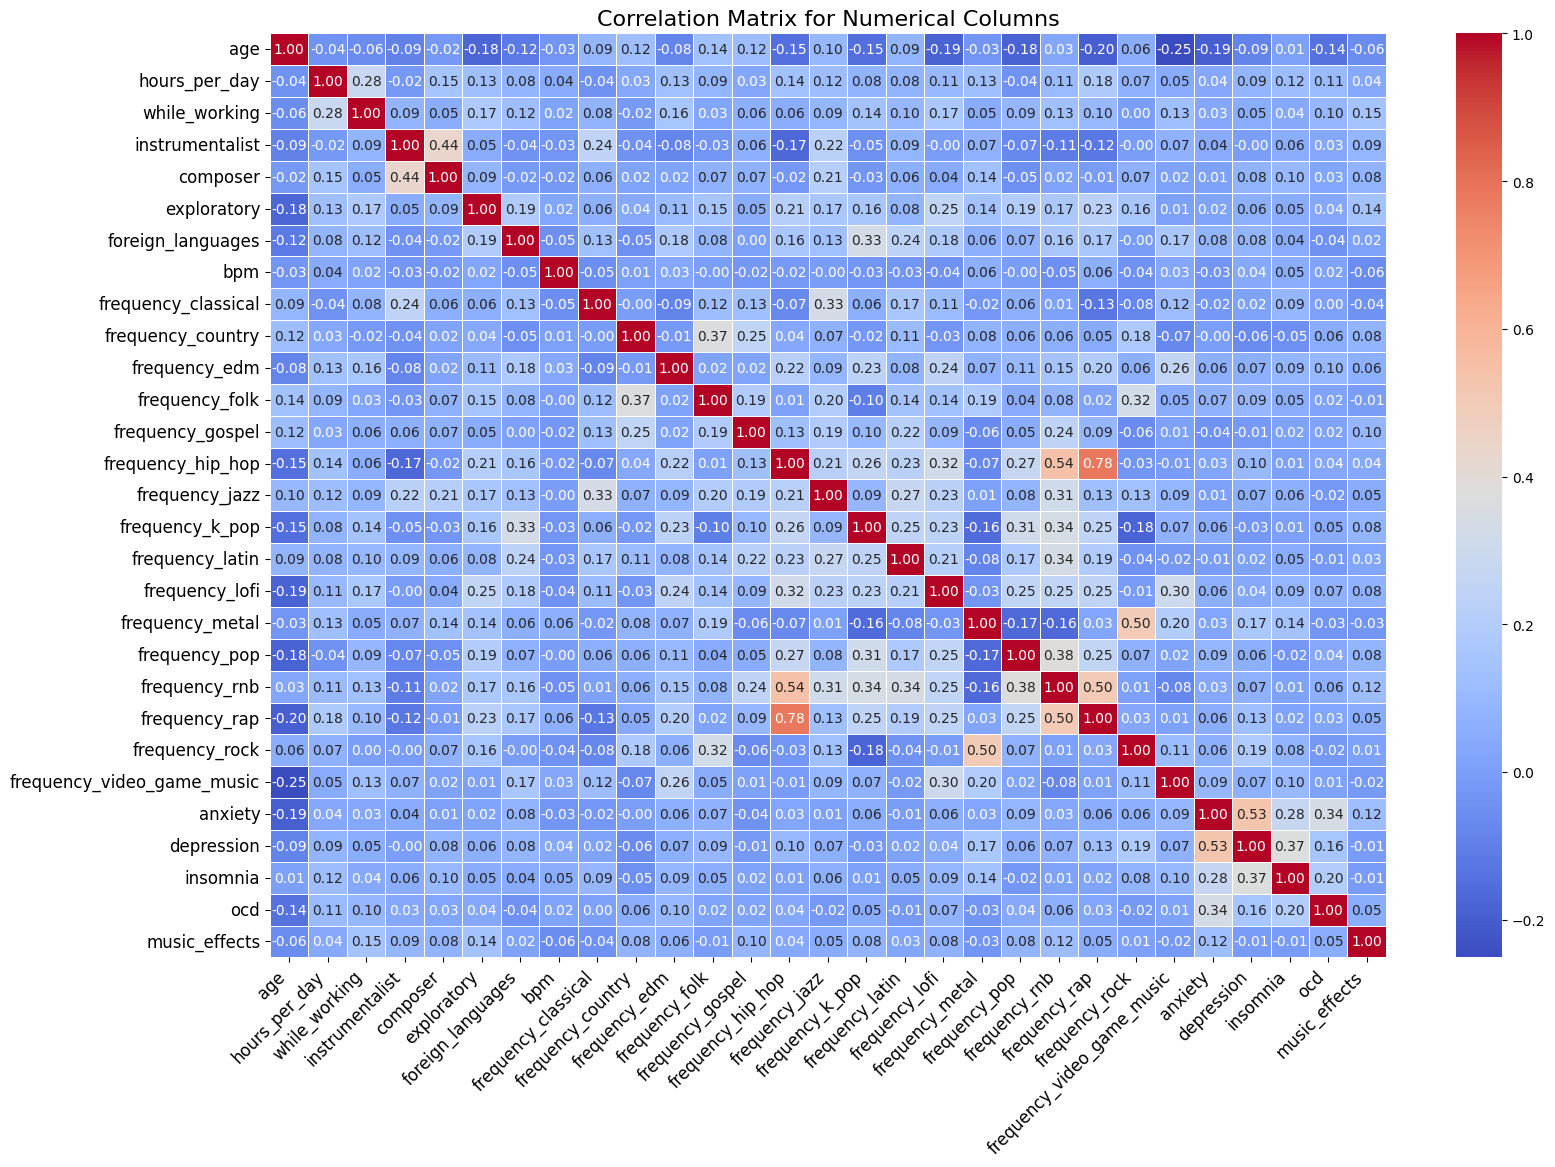

In [108]:
# identify categorical columns
cat_col = ['primary_streaming_service', 'fav_genre']

# correlation matrix for numeric columns
corr_matrix = df_cleaned.drop(columns=cat_col).corr()

# plot the heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 10})
plt.title("Correlation Matrix for Numerical Columns", fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.show()


From the correlation matrix we can see that there isn't too much correlation between the columns in the dataset. We primarly have that the frequency of how often they listen to one genre is correlated to how much they listen to another genre (ex: hiphop, rnb and rap) and that self reported anxiety, depression, insomnia and ocd are correlated. We also have that age is negatively correlated to some genres, which might not be very surprising. There is also a correlation worth mentioning between hours the users listen to music and if they listen at work, and people that play an instrument and people that are composter, which seems natural. It doesn't look like there are too much of a correlation between genre and mental health.

### 2.2 Distributions across columns

#### 2.2.1 Primary Streaming Service and Fav Genre

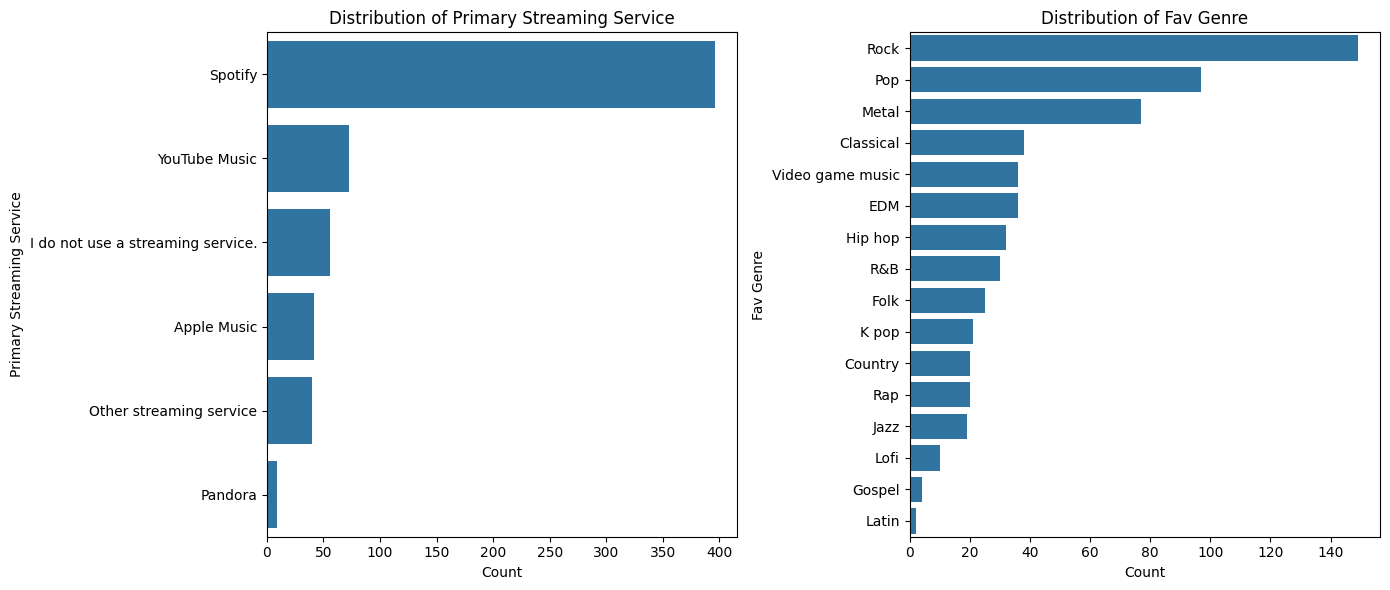

In [109]:
# set up figsize
plt.figure(figsize=(14, 6))

# loop through categorical columns and plot bar charts
for i, col in enumerate(cat_col):
    plt.subplot(1, 2, i+1)  # create subplots for better visualization
    sns.countplot(y=df_cleaned[col], order=df_cleaned[col].value_counts().index)
    plt.title(f"Distribution of {col.replace('_', ' ').title()}")
    plt.xlabel("Count")
    plt.ylabel(col.replace('_', ' ').title())

# plot
plt.tight_layout()
plt.show()

From the histograms we see that Spotify is the primary streaming service for most people, followed by YouTube. <br><br>
The distribution of favorite genre is a bit surprising. We sould expect that pop was by defenition the most popular one, but in this dataset Rock is. This might indicate that the people aren't representative of the population, but as this is a data visualization course and that the data quality didn't matter as much, we have chosen to continue with the dataset

#### 2.2.2 Distribution of mental health columns

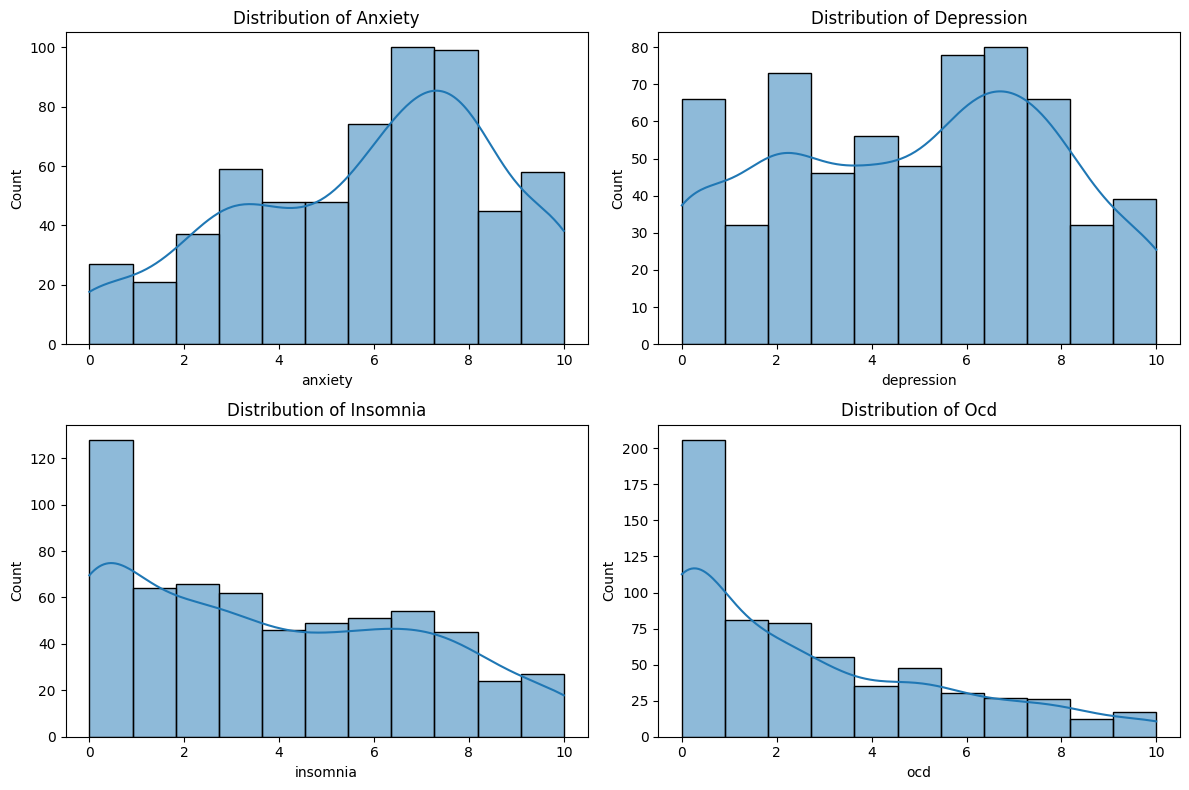

In [110]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

# Loop through each mental health column
for i, col in enumerate(mental_health_cols):
    sns.histplot(data=df_cleaned, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col.title()}")

plt.tight_layout()
plt.show()

From these histograms, we see that anxiety and depression values span the entire 0–10 range with peaks around the middle, indicating moderate levels are relatively common. In contrast, insomnia and ocd are more skewed toward the lower end (0–2), suggesting that most respondents report minimal to mild levels of these conditions. However, there are still notable counts of higher scores in all four categories, indicating representation from all self reported mental health symptoms.

#### 2.2.3 Frequency Music Genres

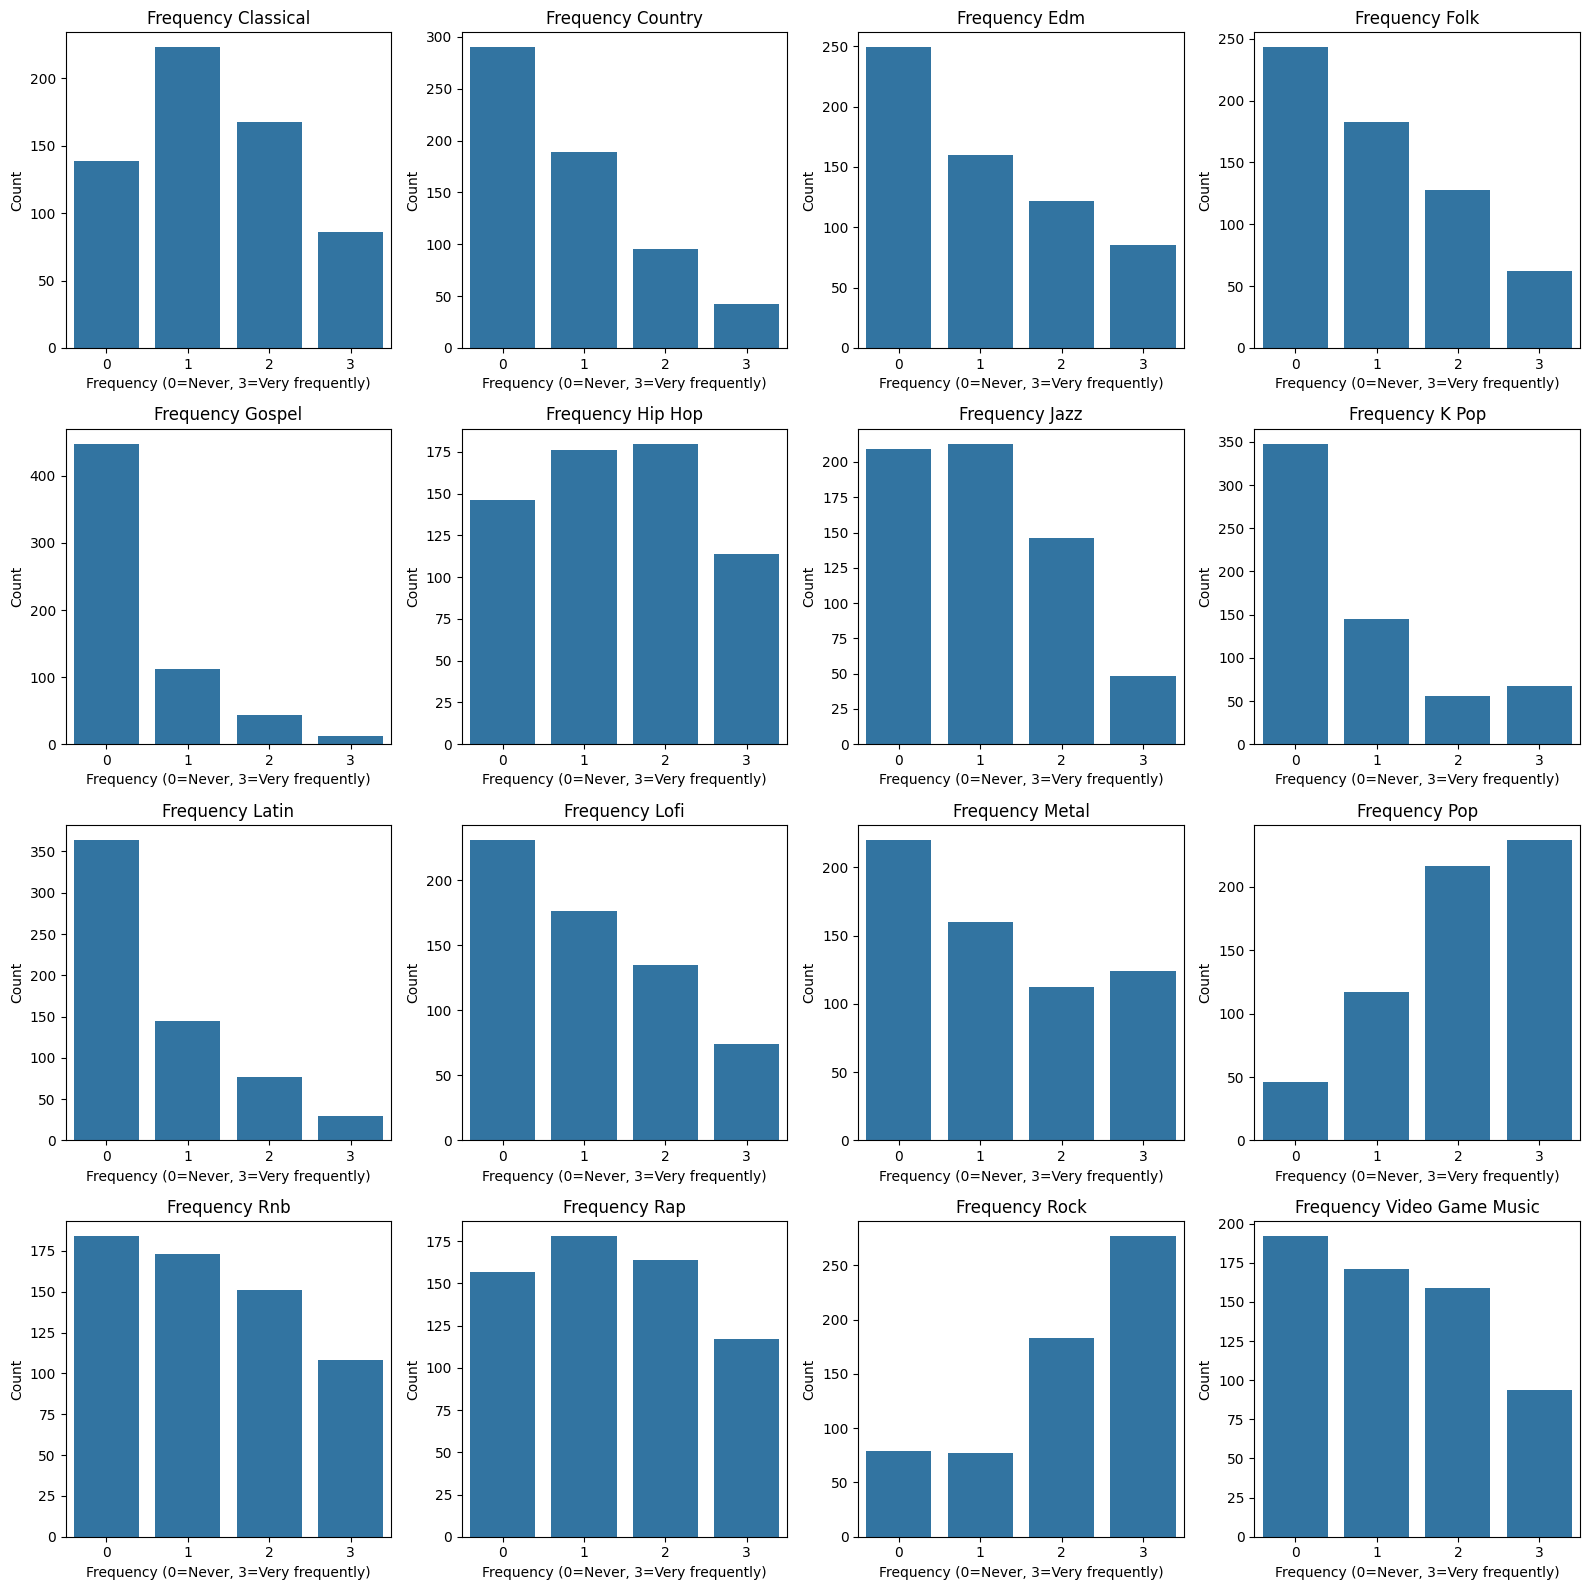

In [ ]:
# Set up a grid of subplots (4 rows, 4 columns)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
axes = axes.flatten()

# Plot each frequency column
for i, col in enumerate(frequency_genre):
    sns.countplot(x=df_cleaned[col], ax=axes[i])
    axes[i].set_title(col.replace('_', ' ').title())
    axes[i].set_xlabel("Frequency (0=Never, 3=Very frequently)")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

From these bar charts, we can see that music preferences vary across genres. Many genres (like Pop, Rap, and Rock) have a sizable proportion of respondents who listen “sometimes” or “very frequently,” indicating higher overall popularity. In contrast, genres such as Gospel or Country show a stronger “never” or “rarely” category, suggesting lower overall engagement. Overall, this distribution highlights the diversity of listening habits in the dataset, with some genres attracting more frequent listeners while others remain niche for most respondents.

### 2.3 Favorite Genre vs Mental Health

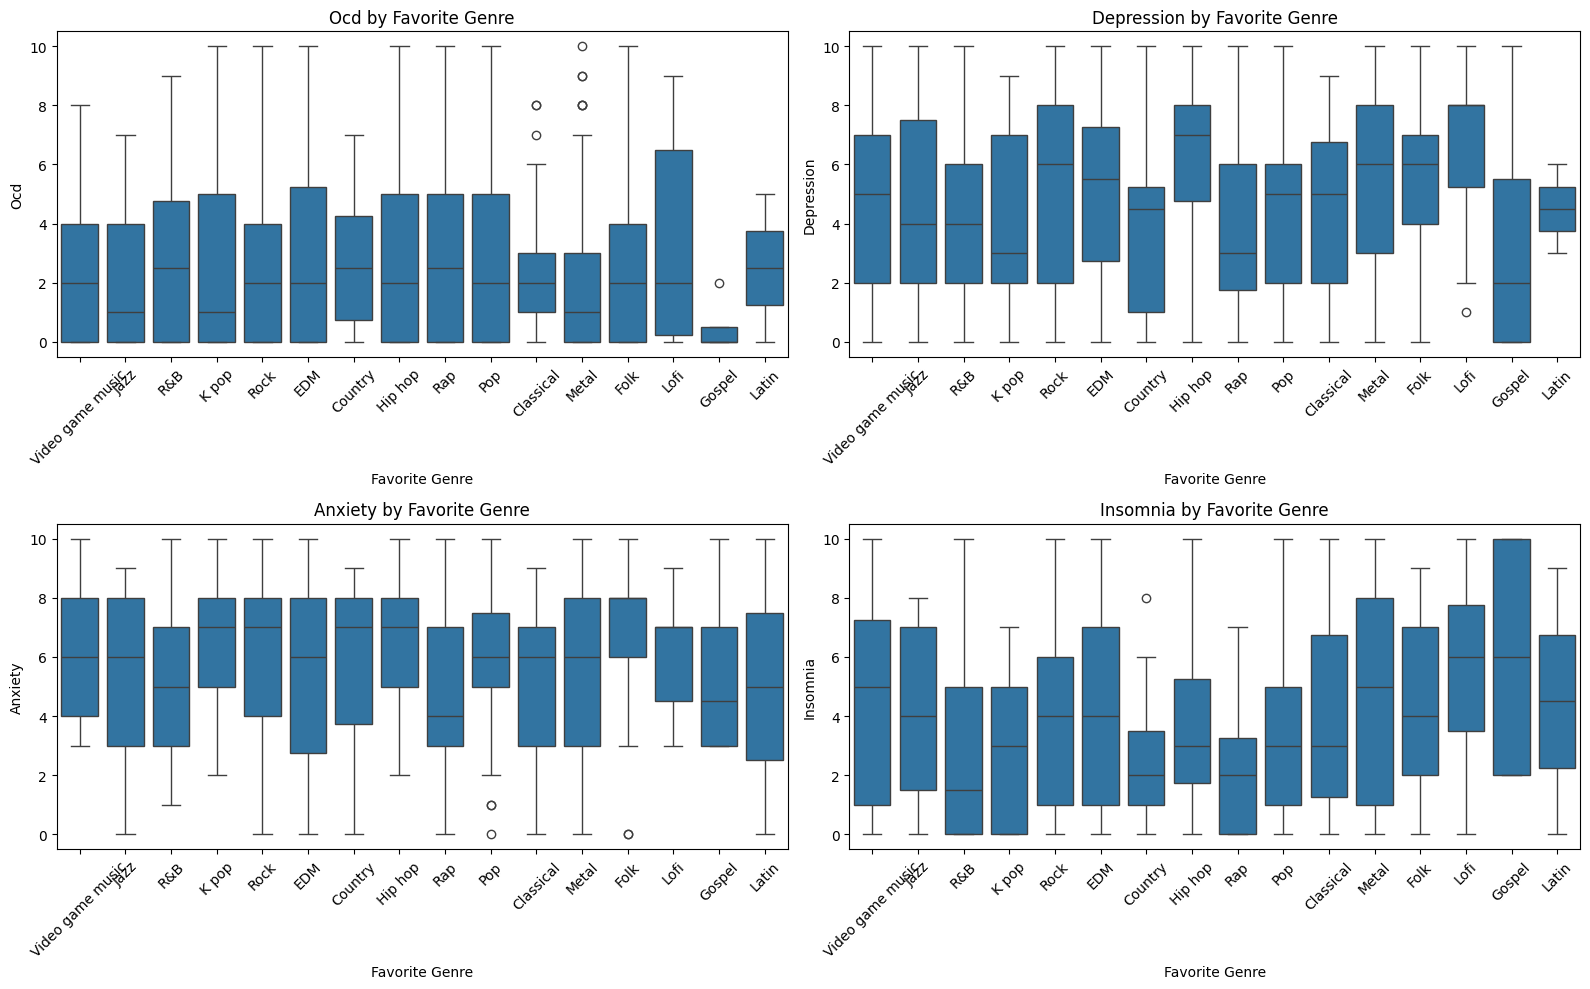

In [ ]:
# create subplots 2x2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axes = axes.flatten()

# box plot for each mental health column vs. favorite genre
for i, col in enumerate(mental_health_cols):
    sns.boxplot(x='fav_genre', y=col, data=df_cleaned, ax=axes[i])
    axes[i].set_title(f"{col.title()} by Favorite Genre")
    axes[i].set_xlabel("Favorite Genre")
    axes[i].set_ylabel(col.title())
    axes[i].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()


From the box plots we observe that overall, each genre exhibits a broad range of scores, indicating that fans of any given genre can experience both lower and higher levels of these symptoms. Some genres show slightly higher medians, suggesting that those listeners may be more likely to report elevated symptom levels. However, there isn’t a single genre that consistently stands out as having exclusively high or low scores. Instead, the distributions highlight that mental health experiences span a wide spectrum within each genre’s listener base.